<a href="https://colab.research.google.com/github/NIlesh-Thamke/Machine-Learning-Practicals/blob/main/Pract7ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/diabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
X = data.drop(columns=["Outcome","Pregnancies","Age"],axis =1)
y = data["Outcome"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train.shape

(614, 6)

In [8]:
X_test.shape

(154, 6)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

score=cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
score

array([0.66233766, 0.62337662, 0.69480519, 0.69934641, 0.65359477])

In [10]:
from sklearn.ensemble import RandomForestClassifier
model_1= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc*100)

Accuracy: 72.72727272727273


In [11]:
Cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", Cm)

Confusion Matrix:
 [[86 14]
 [28 26]]


In [12]:
from sklearn.ensemble import AdaBoostClassifier
model_3 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=1)
model_3.fit(X_train, y_train)
predictions = model_3.predict(X_test)
Acc3 = accuracy_score(y_test, predictions)
print("Accuracy : ",Acc3*100)


Accuracy :  69.48051948051948


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
model_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)
Acc2 =accuracy_score(y_test, predictions)

In [14]:
print("Accuracy : ",Acc2*100)

Accuracy :  70.12987012987013


In [15]:
from xgboost import XGBClassifier
model_4 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
model_4.fit(X_train, y_train)
predictions = model_4.predict(X_test)
Acc4 = accuracy_score(y_test, predictions)
print("Accuracy : ",Acc4*100)

Accuracy :  69.48051948051948


In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
model_5 = BaggingClassifier(n_estimators=100, random_state=1)
model_5.fit(X_train, y_train)
predictions = model_5.predict(X_test)
Acc5 = accuracy_score(y_test, predictions)
print("Accuracy : ",Acc5*100)


Accuracy :  71.42857142857143


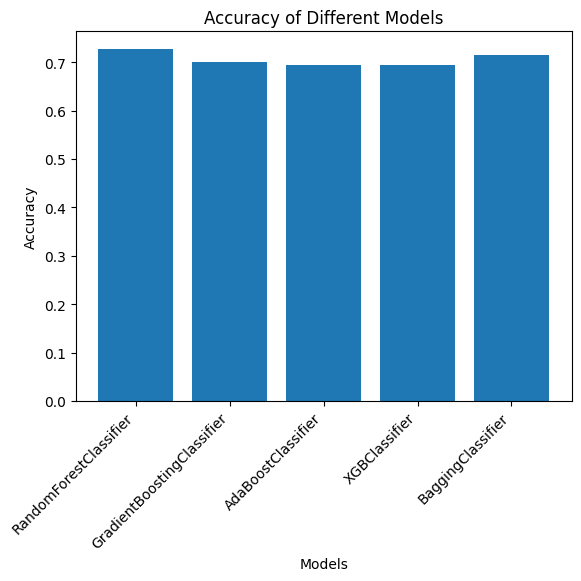

In [22]:
models=['RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier','BaggingClassifier'] # Changed to string representations of the model names
accuracy=[acc,Acc2,Acc3,Acc4,Acc5]
plt.bar(models,accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.show()

# **BONUS ASSIGNMENT**

In [23]:
data2 = pd.read_csv('/content/HeartDiseaseTrain-Test.csv')
print(data2.head())

   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [24]:
print(data2.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [47]:
X = data2.drop(columns=['target', 'age', 'sex', 'slope'], axis=1)
y = data2['target']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
categorical_features = ['chest_pain_type', 'resting_blood_pressure', 'thalassemia', 'exercise_induced_angina', 'cholestoral', 'fasting_blood_sugar', 'oldpeak']

# 2. Create a LabelEncoder for each categorical feature
label_encoders = {}
for feature in categorical_features: # Changed 'ategorical_features' to 'categorical_features'
    label_encoders[feature] = LabelEncoder()
    X_train[feature] = label_encoders[feature].fit_transform(X_train[feature])
    X_test[feature] = label_encoders[feature].transform(X_test[feature])

In [71]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [72]:
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8439024390243902
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83       102
           1       0.80      0.92      0.86       103

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



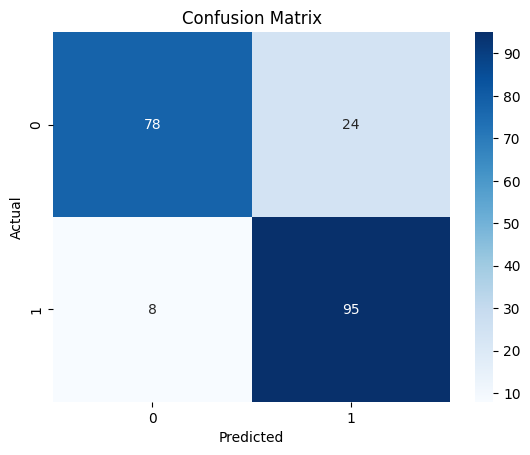

In [75]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [76]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_train_acc = accuracy_score(y_train, dt_model.predict(X_train))
dt_test_acc = accuracy_score(y_test, dt_model.predict(X_test))

print("Decision Tree:")
print("Train Accuracy:", dt_train_acc)
print("Test Accuracy :", dt_test_acc)


Decision Tree:
Train Accuracy: 1.0
Test Accuracy : 0.9707317073170731
